<a href="https://colab.research.google.com/github/anwarrior/Assignments/blob/main/Hierarchical_Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


In [8]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)  

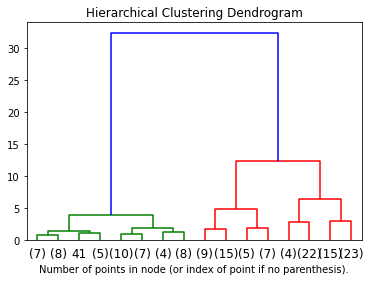

In [9]:
iris = load_iris()
X = iris.data
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

#Customer Data

In [10]:
#The problem is to segment customers into different groups based on their shopping trends.importing Purchase_data   
data_set= pd.read_csv("/content/Customers_data.csv") 
data_set.columns
print(data_set.head())

   CustomerID   Genre  Age  AnnualIncome  SpendingScore
0           1    Male   19            15             39
1           2    Male   21            15             81
2           3  Female   20            16              6
3           4  Female   23            16             77
4           5  Female   31            17             40


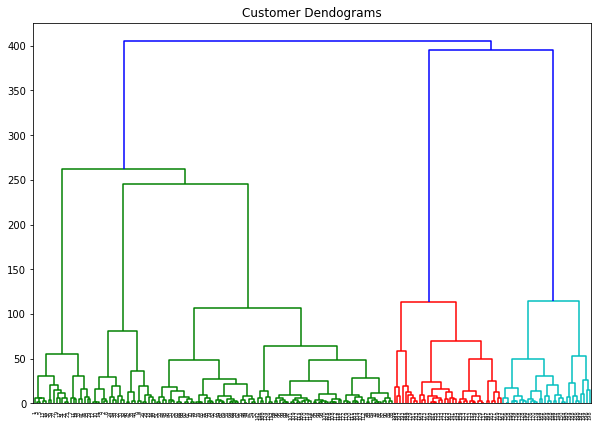

In [11]:
# Dendrogram: linkage method takes the dataset and the method to 
#minimize distances as parameters. We use 'ward' as the method 
#since it minimizes then variants of distances between the clusters
Y = data_set.iloc[:,3:5].values  
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(Y, method='ward'))

In [12]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(Y)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

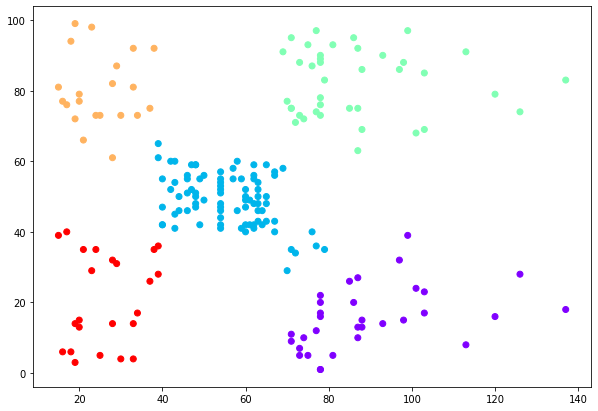

In [13]:
#Plot data with clutser lables
plt.figure(figsize=(10, 7))
plt.scatter(Y[:,0], Y[:,1], c=cluster.labels_,cmap='rainbow')
plt.show()

#Utilities Data

In [14]:
#Imprt required libraries
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns

In [15]:
#Load Utilities data file
utilities_df = pd.read_csv('/content/Utilities.csv')
utilities_df.head()

,Company,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
1,Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
2,Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
3,Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
4,NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044


In [16]:
# set row names to the utilities column
utilities_df.set_index('Company',inplace=True)
# while not required, the conversion of integer data to float
# will avoid a warning when applying the scale function
utilities_df = utilities_df.apply(lambda x: x.astype('float64'))
#preprocesssing data 
# scikit-learn uses population standard deviation
utilities_df_norm = utilities_df.apply(preprocessing.scale, axis=0)
# pandas uses sample standard deviation
utilities_df_norm = (utilities_df - utilities_df.mean())/utilities_df.std()
# compute normalized distance based on Sales and Fuel Cost
utilities_df_norm[['Sales', 'Fuel_Cost']]
d_norm = pairwise.pairwise_distances(utilities_df_norm[['Sales', 'Fuel_Cost']],metric='euclidean')
pd.DataFrame(d_norm, columns=utilities_df.index, index=utilities_df.index)

Company,Arizona,Boston,Central,Commonwealth,NY,Florida,Hawaiian,Idaho,Kentucky,Madison,Nevada,New England,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
Company,,,,,,,,,,,,,,,,,,,,,,
Arizona,0.000000,2.010329,0.774179,0.758738,3.021907,1.244422,1.885248,1.265638,0.461292,0.738650,2.369479,2.425975,0.564657,0.182648,1.570780,1.947668,2.509043,0.913621,1.247976,0.521491,2.761745,1.252350
Boston,2.010329,0.000000,1.465703,1.582821,1.013370,1.792397,0.740283,3.176654,1.557738,1.719632,3.756513,0.684393,1.940166,2.166078,0.478334,3.501390,0.679634,1.634425,2.890560,1.654255,1.100595,1.479261
Central,0.774179,1.465703,0.000000,1.015710,2.432528,0.631892,1.156092,1.732777,0.419254,1.102287,2.375975,1.737322,1.113433,0.855093,0.987772,2.065643,1.836762,0.276440,1.428159,0.838967,2.034824,0.510365
Commonwealth,0.758738,1.582821,1.015710,0.000000,2.571969,1.643857,1.746027,2.003230,0.629994,0.138758,3.106084,2.153831,0.377004,0.937389,1.258835,2.699060,2.202930,1.278514,1.998818,0.243408,2.547116,1.502093
NY,3.021907,1.013370,2.432528,2.571969,0.000000,2.635573,1.411695,4.162561,2.566439,2.705445,4.597006,0.846291,2.938637,3.174588,1.462019,4.397433,0.715629,2.558409,3.831132,2.661786,0.952507,2.328691
Florida,1.244422,1.792397,0.631892,1.643857,2.635573,0.000000,1.228805,1.764123,1.025663,1.722510,1.971518,1.831380,1.698624,1.243634,1.343185,1.767581,1.953423,0.366744,1.277920,1.452417,2.016493,0.313847
Hawaiian,1.885248,0.740283,1.156092,1.746027,1.411695,1.228805,0.000000,2.860189,1.436822,1.880361,3.185311,0.608107,2.027224,1.997036,0.560997,2.995848,0.726095,1.205034,2.463227,1.711256,0.879934,0.929414
Idaho,1.265638,3.176654,1.732777,2.003230,4.162561,1.764123,2.860189,0.000000,1.650417,1.950296,1.479526,3.458771,1.708409,1.083449,2.705579,0.992092,3.563727,1.658671,0.600089,1.778813,3.720421,1.980715
Kentucky,0.461292,1.557738,0.419254,0.629994,2.566439,1.025663,1.436822,1.650417,0.000000,0.697674,2.550689,1.966323,0.694524,0.608401,1.110854,2.180496,2.048098,0.658996,1.493274,0.426780,2.308613,0.929141


{'color_list': ['g',
  'g',
  'r',
  'r',
  'r',
  'b',
  'c',
  'c',
  'c',
  'c',
  'c',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'b',
  'b',
  'b',
  'b'],
 'dcoord': [[0.0, 2.2014571837316304, 2.2014571837316304, 0.0],
  [0.0, 3.4462747386146937, 3.4462747386146937, 2.2014571837316304],
  [0.0, 1.3841237675943323, 1.3841237675943323, 0.0],
  [0.0, 2.167725424204014, 2.167725424204014, 1.3841237675943323],
  [0.0, 2.4520417300202317, 2.4520417300202317, 2.167725424204014],
  [0.0, 3.642377194293253, 3.642377194293253, 2.4520417300202317],
  [0.0, 1.4070319360727574, 1.4070319360727574, 0.0],
  [0.0, 1.8164648405943182, 1.8164648405943182, 0.0],
  [1.4070319360727574,
   2.087328933767128,
   2.087328933767128,
   1.8164648405943182],
  [0.0, 2.421916244274773, 2.421916244274773, 0.0],
  [2.087328933767128, 2.724783803144941, 2.724783803144941, 2.421916244274773],
  [0.0, 2.7526225957318666, 2.7526225957318666, 0.0],
  [0.0, 1.8760514825742203, 1.8760514825742203, 0.0],
  [0.0, 1.

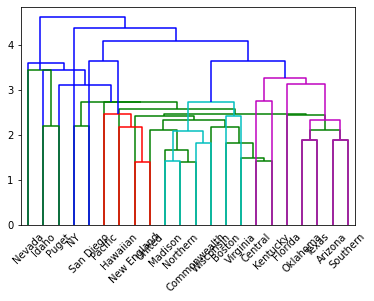

In [17]:
# in linkage() set argument method =
# ’single’, ’complete’, ’average’, ’weighted’, centroid’, ’median’, ’ward’
Z = linkage(utilities_df_norm, method='single')
dendrogram(Z, labels=utilities_df_norm.index, color_threshold=2.75)
Z = linkage(utilities_df_norm, method='average')
dendrogram(Z, labels=utilities_df_norm.index, color_threshold=3.6)

In [18]:
#Single linkage 
memb = fcluster(linkage(utilities_df_norm, method='single'), 6,
criterion='maxclust')
memb = pd.Series(memb, index=utilities_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ':', ', '.join(item.index))

1 : Idaho, Puget
2 : Arizona, Boston, Commonwealth, Florida, Hawaiian, Kentucky, Madison, New England, Northern, Oklahoma, Pacific, Southern, Texas, Wisconsin, United, Virginia
3 : Central
4 : San Diego
5 : Nevada
6 : NY


In [19]:
#Average linkage method
memb = fcluster(linkage(utilities_df_norm, method='average'), 6,criterion='maxclust')
memb = pd.Series(memb, index=utilities_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  Idaho, Nevada, Puget
2 :  Hawaiian, New England, Pacific, United
3 :  San Diego
4 :  Boston, Commonwealth, Madison, Northern, Wisconsin, Virginia
5 :  Arizona, Central, Florida, Kentucky, Oklahoma, Southern, Texas
6 :  NY


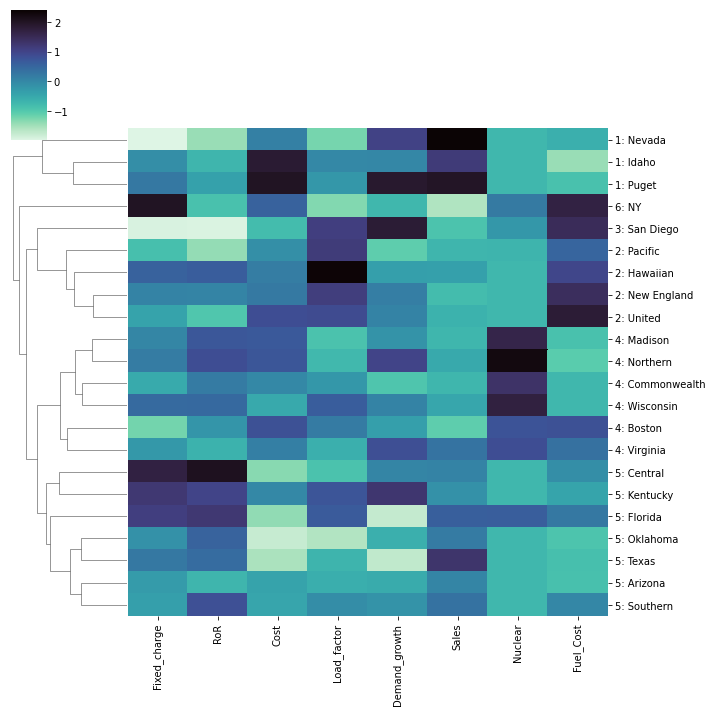

In [20]:
# set labels as cluster membership and utility name
utilities_df_norm.index = ['{}: {}'.format(cluster, state)
for cluster,state in zip(memb,utilities_df_norm.index)]
# plot heatmap the ’_r’ suffix reverses the color mapping to large = dark
sns.clustermap(utilities_df_norm, method='average', col_cluster=False,cmap='mako_r')